In [46]:
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [26]:
# Load the CSV file into a pandas DataFrame
csv_file = '../Data/WWSCAN_SARSCoV2_California_20240126.csv' 
df = pd.read_csv(csv_file)
df.head()

,sample_id,collection_date,bcov_recovery,bcov_recovery_lci,bcov_recovery_uci,city,state,name,site_name,sewershed_pop,state_abbr,N_Gene_gc_g_dry_weight,N_Gene_gc_g_dry_weight_lci,N_Gene_gc_g_dry_weight_uci
0,COD110144,2021-07-29,1.804,1.699,1.902,CODIGA,California,"CODIGA, Stanford, CA",CODIGA,10000,CA,5356.637828,3390.215008,7661.580561
1,COD110138,2021-07-30,2.076,1.926,2.292,CODIGA,California,"CODIGA, Stanford, CA",CODIGA,10000,CA,35745.106990,29625.140476,42655.292019
2,COD110132,2021-08-03,8.111,7.805,8.436,CODIGA,California,"CODIGA, Stanford, CA",CODIGA,10000,CA,137282.230820,122276.597980,149323.020468
3,COD110120,2021-08-04,1.039,0.973,1.095,CODIGA,California,"CODIGA, Stanford, CA",CODIGA,10000,CA,224553.040808,203460.558545,259321.540364
4,COD110114,2021-08-05,1.083,1.052,1.107,CODIGA,California,"CODIGA, Stanford, CA",CODIGA,10000,CA,58317.808745,50087.051695,67502.439261


In [27]:
df.columns

Index(['sample_id', 'collection_date', 'bcov_recovery', 'bcov_recovery_lci',
       'bcov_recovery_uci', 'city', 'state', 'name', 'site_name',
       'sewershed_pop', 'state_abbr', 'N_Gene_gc_g_dry_weight',
       'N_Gene_gc_g_dry_weight_lci', 'N_Gene_gc_g_dry_weight_uci'],
      dtype='object')

In [28]:
df.describe

<bound method NDFrame.describe of         sample_id collection_date  bcov_recovery  bcov_recovery_lci  \
0       COD110144      2021-07-29          1.804              1.699   
1       COD110138      2021-07-30          2.076              1.926   
2       COD110132      2021-08-03          8.111              7.805   
3       COD110120      2021-08-04          1.039              0.973   
4       COD110114      2021-08-05          1.083              1.052   
...           ...             ...            ...                ...   
20603  123-240101      2024-01-01          1.456              1.311   
20604  123-240108      2024-01-08          1.014              0.816   
20605  123-240110      2024-01-10          1.572              0.986   
20606  123-240112      2024-01-12          1.576              1.342   
20607  123-240122      2024-01-22          1.062              0.833   

       bcov_recovery_uci      city       state                  name  \
0                  1.902    CODIGA  Calif

In [29]:
# Check for missing values
missing_values = df.isna()  # or df.isnull()

# Display the DataFrame of missing values
missing_values

missing_count = missing_values.sum()
print(missing_count)

sample_id                     0
collection_date               0
bcov_recovery                 1
bcov_recovery_lci             1
bcov_recovery_uci             1
city                          0
state                         0
name                          0
site_name                     0
sewershed_pop                 0
state_abbr                    0
N_Gene_gc_g_dry_weight        0
N_Gene_gc_g_dry_weight_lci    0
N_Gene_gc_g_dry_weight_uci    0
dtype: int64


In [30]:
# Create new DataFrame with desired columns
new_df = df[['collection_date', 'site_name', 'name', 'sewershed_pop', 'N_Gene_gc_g_dry_weight']]
new_df

,collection_date,site_name,name,sewershed_pop,N_Gene_gc_g_dry_weight
0,2021-07-29,CODIGA,"CODIGA, Stanford, CA",10000,5356.637828
1,2021-07-30,CODIGA,"CODIGA, Stanford, CA",10000,35745.106990
2,2021-08-03,CODIGA,"CODIGA, Stanford, CA",10000,137282.230820
3,2021-08-04,CODIGA,"CODIGA, Stanford, CA",10000,224553.040808
4,2021-08-05,CODIGA,"CODIGA, Stanford, CA",10000,58317.808745
...,...,...,...,...,...
20603,2024-01-01,Woodland Water Pollution Control Facility,"Woodland, CA",59000,176098.021439
20604,2024-01-08,Woodland Water Pollution Control Facility,"Woodland, CA",59000,406093.313012
20605,2024-01-10,Woodland Water Pollution Control Facility,"Woodland, CA",59000,82113.964505
20606,2024-01-12,Woodland Water Pollution Control Facility,"Woodland, CA",59000,41975.766149


In [31]:
# Create new DataFrame with desired columns for North California
north_cities = ['East Bay Municipal Utility District', 'Sausalito-Marin City Sanitary District', 'City of San Leandro Water Pollution Control Plant', 'Oceanside Water Pollution Control Plant']
north_CA_df = new_df[new_df['site_name'].isin(north_cities)]
north_CA_df

,collection_date,site_name,name,sewershed_pop,N_Gene_gc_g_dry_weight
7819,2022-02-15,East Bay Municipal Utility District,"Oakland, CA",740000,17431.372089
7820,2022-02-16,East Bay Municipal Utility District,"Oakland, CA",740000,15847.038106
7821,2022-02-17,East Bay Municipal Utility District,"Oakland, CA",740000,11888.022540
7822,2022-02-22,East Bay Municipal Utility District,"Oakland, CA",740000,3800.484357
7823,2022-02-23,East Bay Municipal Utility District,"Oakland, CA",740000,4046.915499
...,...,...,...,...,...
16833,2024-01-10,Sausalito-Marin City Sanitary District,"Sausalito, CA",18000,574348.404894
16834,2024-01-11,Sausalito-Marin City Sanitary District,"Sausalito, CA",18000,117305.145740
16835,2024-01-16,Sausalito-Marin City Sanitary District,"Sausalito, CA",18000,774684.328703
16836,2024-01-17,Sausalito-Marin City Sanitary District,"Sausalito, CA",18000,388642.721518


In [48]:
# Convert 'collection_date' column to datetime objects
north_CA_df['collection_date'] = pd.to_datetime(df['collection_date'])

# Define the date range
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')

# Collect data in 2023
north_CA_df = north_CA_df[(north_CA_df['collection_date'] >= start_date) & (north_CA_df['collection_date'] <= end_date)]

# Create an average column
north_CA_df['Average'] = north_CA_df['N_Gene_gc_g_dry_weight'] / north_CA_df['sewershed_pop']

north_CA_df

,collection_date,site_name,name,sewershed_pop,N_Gene_gc_g_dry_weight,Average
7958,2023-01-03,East Bay Municipal Utility District,"Oakland, CA",740000,299863.532741,0.405221
7959,2023-01-04,East Bay Municipal Utility District,"Oakland, CA",740000,58661.312527,0.079272
7960,2023-01-05,East Bay Municipal Utility District,"Oakland, CA",740000,352958.655853,0.476971
7961,2023-01-10,East Bay Municipal Utility District,"Oakland, CA",740000,104551.034394,0.141285
7962,2023-01-11,East Bay Municipal Utility District,"Oakland, CA",740000,88848.661333,0.120066
...,...,...,...,...,...,...
16824,2023-12-20,Sausalito-Marin City Sanitary District,"Sausalito, CA",18000,578489.135936,32.138285
16825,2023-12-21,Sausalito-Marin City Sanitary District,"Sausalito, CA",18000,461381.450068,25.632303
16826,2023-12-26,Sausalito-Marin City Sanitary District,"Sausalito, CA",18000,84310.812257,4.683934
16827,2023-12-27,Sausalito-Marin City Sanitary District,"Sausalito, CA",18000,596647.678265,33.147093


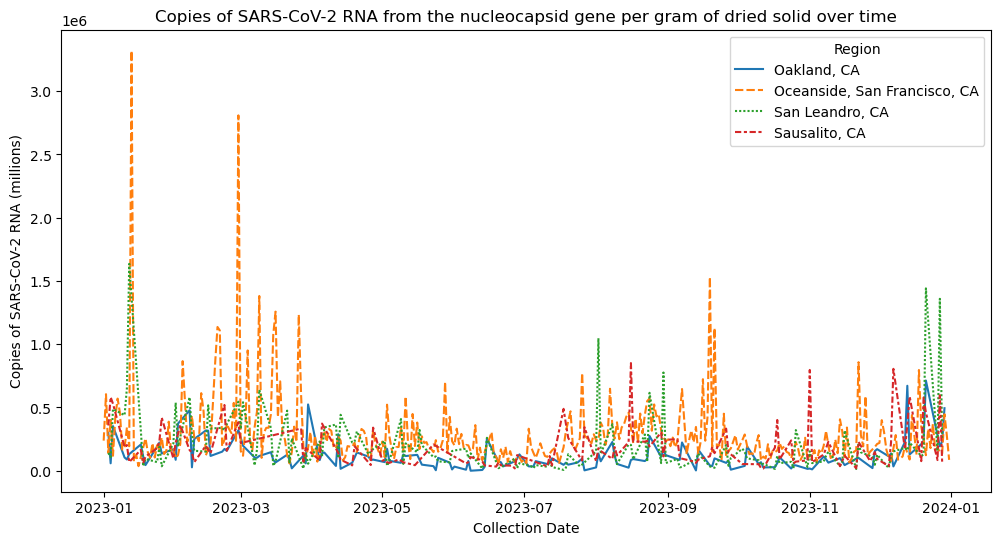

In [52]:
# Creating the Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=north_CA_df, x='collection_date', y='N_Gene_gc_g_dry_weight', hue='name', style='name')
plt.title('Copies of SARS-CoV-2 RNA from the nucleocapsid gene per gram of dried solid over time')
plt.xlabel('Collection Date')
plt.ylabel('Copies of SARS-CoV-2 RNA (millions)')
plt.legend(title='Region')
plt.show()

In [40]:
# Export to csv file
north_CA_df.to_csv('../Data/Northern_California_Sample.csv', index = False)

In [36]:
# Create new DataFrame with desired columns for South California
south_cities = ['Hyperion Water Reclamation Plant (HWRP)', 'Joint Water Pollution Control Plant', 'Regional Water Recycling Plant No.1 (RP-1)']
south_CA_df = new_df[new_df['site_name'].isin(south_cities)]
south_CA_df

,collection_date,site_name,name,sewershed_pop,N_Gene_gc_g_dry_weight
5233,2022-01-09,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,6.388278e+05
5234,2022-01-10,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,1.136095e+06
5235,2022-01-12,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,1.274530e+05
5236,2022-01-16,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,2.815259e+05
5237,2022-01-17,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,4.371872e+05
...,...,...,...,...,...
9464,2024-01-11,Regional Water Recycling Plant No.1 (RP-1),"Ontario, CA",890000,1.905757e+05
9465,2024-01-15,Regional Water Recycling Plant No.1 (RP-1),"Ontario, CA",890000,2.615375e+05
9466,2024-01-17,Regional Water Recycling Plant No.1 (RP-1),"Ontario, CA",890000,1.593223e+05
9467,2024-01-18,Regional Water Recycling Plant No.1 (RP-1),"Ontario, CA",890000,1.297634e+05


In [44]:
# Convert 'collection_date' column to datetime objects
south_CA_df['collection_date'] = pd.to_datetime(df['collection_date'])

# Define the date range
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')

# Collect data in 2023
south_CA_df = south_CA_df[(south_CA_df['collection_date'] >= start_date) & (south_CA_df['collection_date'] <= end_date)]

# Create an average column
south_CA_df['Average'] = south_CA_df['N_Gene_gc_g_dry_weight'] / south_CA_df['sewershed_pop']

south_CA_df

,collection_date,site_name,name,sewershed_pop,N_Gene_gc_g_dry_weight,Average
5383,2023-01-01,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,527757.138612,0.150788
5384,2023-01-02,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,389195.906456,0.111199
5385,2023-01-04,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,198762.013333,0.056789
5386,2023-01-08,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,313013.523177,0.089432
5387,2023-01-09,Joint Water Pollution Control Plant,"Los Angeles County, CA",3500000,568464.428247,0.162418
...,...,...,...,...,...,...
9454,2023-12-20,Regional Water Recycling Plant No.1 (RP-1),"Ontario, CA",890000,240650.759911,0.270394
9455,2023-12-21,Regional Water Recycling Plant No.1 (RP-1),"Ontario, CA",890000,273894.691702,0.307747
9456,2023-12-25,Regional Water Recycling Plant No.1 (RP-1),"Ontario, CA",890000,358503.197381,0.402813
9457,2023-12-27,Regional Water Recycling Plant No.1 (RP-1),"Ontario, CA",890000,32389.941646,0.036393


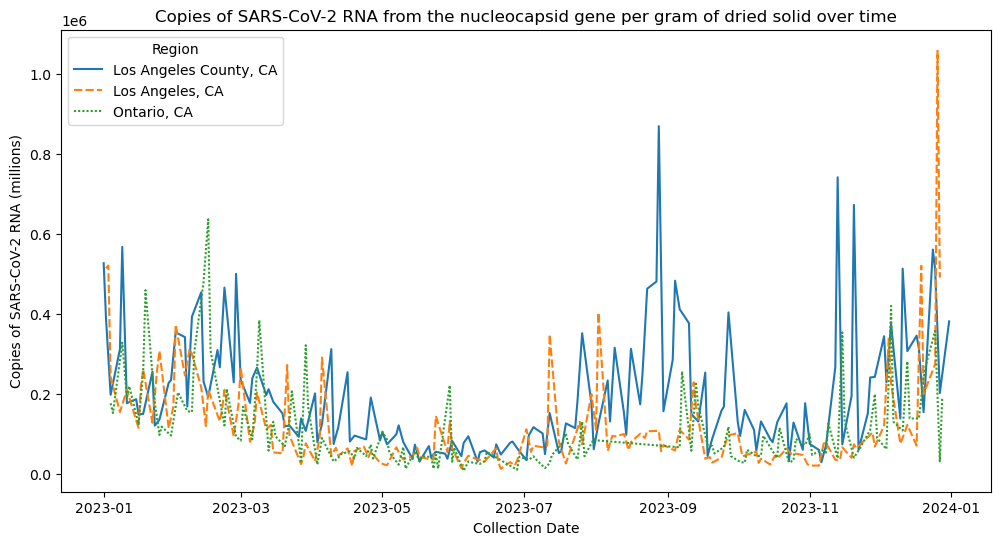

In [53]:
# Creating the Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=south_CA_df, x='collection_date', y='N_Gene_gc_g_dry_weight', hue='name', style='name')
plt.title('Copies of SARS-CoV-2 RNA from the nucleocapsid gene per gram of dried solid over time')
plt.xlabel('Collection Date')
plt.ylabel('Copies of SARS-CoV-2 RNA (millions)')
plt.legend(title='Region')
plt.show()

In [43]:
# Export to csv file
south_CA_df.to_csv('../Data/Southern_California_Sample.csv', index = False)